# Correlacipon entre puntos


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import math as mt

## Funciones para visualización

In [48]:
def verCubo(puntos):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(aleatorio.T[0], aleatorio.T[1], aleatorio.T[2], marker = '.', alpha = 0.3)

In [278]:
def ver_correlacion(y, l):
    
    x = [(x+1)*(l/len(y)) + (l-1)/len(y)/2 for x in range(len(y))]
    
    plt.plot(x, y, marker = '.')
    plt.xlabel('r')
    plt.ylabel('$\epsilon$(r)')
    plt.title('Correlación vs Distancia')

## Funciones auxiliares

In [72]:
def puntos(n, l = 1, dim=3, seed = 1):
    '''
    DESCRIPTION: Crea un hipercubo de lado L con n puntos con distribución unforme
    IN: n = Número de puntos
        l = Tamaño del lado (default l = 1)
        dim = dimensión del cubo (default dim = 3)
    OUT: numpy array con n puntos
    '''
    np.random.seed(seed)
    return np.random.rand(n, dim)*l

In [296]:
def n_distancia(puntos1, puntos2):
    '''
    DESCRIPTION: Calcula distancias entre todos los puntos de dos arreglos
    IN: puntos1, puntos2 = Numpy array con posiciones de los puntos, mismo tamaño
    OUT: Matriz con distancias entre puntos de arreglo1 vs arreglo2
    '''
    N = len(puntos2)
    dist = []
    
    for i in range(N):
        dist.append(np.sum(np.square(puntos2 - puntos1[i]), axis = 1)**(1/2))

        print(i)
        clear_output(wait=True)
     
    return dist

## Funciones de correlación

In [312]:
def correlacion(datos, random, l = 1, n_bins = 15):
    
    #Creamos los bins
    bins = [(x+1)*(l-1)/n_bins for x in range(n_bins)]
    
    #Calculamos las distancias entre los datos dados
    d_distancias = n_distancia(datos, datos)
    d_distancias = np.array(d_distancias).flatten()
    #d_distancias = np.delete(d_distancias, np.where(d_distancias <= 0))
    
    #Creamos un histograma
    dd = np.array(np.histogram(d_distancias, bins = bins)[0])/2
    
    #Calculamos las distancias entre los puntos random
    r_distancias = n_distancia(random, random)
    r_distancias = np.array(r_distancias).flatten()
    #r_distancias = np.delete(r_distancias, np.where(r_distancias == 0))
    
    #Creamos un histograma
    rr = np.array(np.histogram(r_distancias, bins = bins)[0])/2
    
    #creamos correlación
    
    n_d = mt.factorial(len(datos)) / (2*mt.factorial(len(datos)-2))
    n_r = mt.factorial(len(random)) / (2*mt.factorial(len(random)-2))
    
    e = (n_r*dd)/(n_d*rr) - 1 
    
    return e

In [327]:
def correlacion_LS(datos, random, l = 1, n_bins = 15):
    #Creamos los bins
    bins = [(x+1)*(l-1)/n_bins for x in range(n_bins)]
    
    #Calculamos las distancias entre los datos dados
    d_distancias = n_distancia(datos, datos)
    d_distancias = np.array(d_distancias).flatten()
    #d_distancias = np.delete(d_distancias, np.where(d_distancias == 0))
    dd = np.array(np.histogram(d_distancias, bins = bins)[0])/2
    
    #Calculamos las distancias entre los puntos random
    r_distancias = n_distancia(random, random)
    r_distancias = np.array(r_distancias).flatten()
    #r_distancias = np.delete(r_distancias, np.where(r_distancias == 0))
    rr = np.array(np.histogram(r_distancias, bins = bins)[0])/2
    
    #Calculamos las distancia entre datos+random
    rd_distancias = n_distancia(datos, random)
    rd_distancias = np.array(rd_distancias).flatten()
    #rd_distancias = np.delete(rd_distancias, np.where(rd_distancias == 0))
    rd = np.array(np.histogram(rd_distancias, bins = bins)[0])/2
    rd += dd + rr
    
    #Los numero de puntos posibles
    n_d = mt.factorial(len(datos)) / (2*mt.factorial(len(datos)-2))
    n_r = mt.factorial(len(random)) / (2*mt.factorial(len(random)-2))
    n_rd = mt.factorial(len(random)+len(datos)) / (2*mt.factorial(len(random)+len(datos)-2))
                                                   
    #creamos la correlación de Landy-Szalay
    e = (dd/n_d - 2*rd/n_rd + rr/n_r) / (rr/n_r)
    
    return e

### Prueba con el mismo cubo

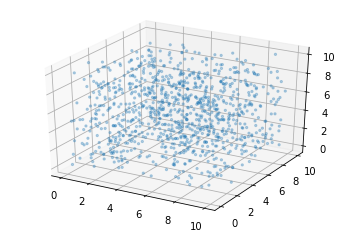

In [328]:
cubo = puntos(1000, l = 10, seed = 1)
verCubo(cubo)

Con estimador simple:

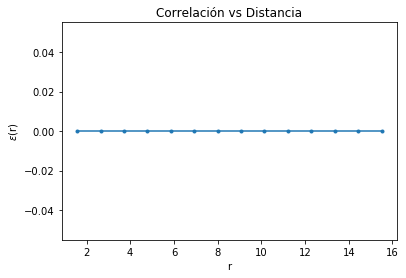

In [329]:
y = correlacion(cubo, cubo, l = 15, n_bins = 15)
ver_correlacion(y, l = 15)

Con estimador de Landy-Szalay

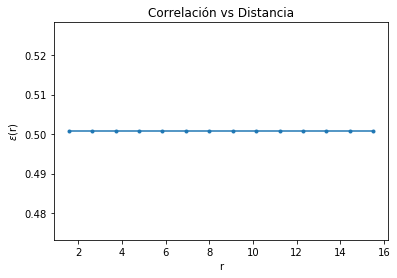

In [330]:
y_LS = correlacion_LS(cubo, cubo, l = 15, n_bins = 15)
ver_correlacion(y_LS, l = 15)

### Con dos cubos diferentes pero aleatorios

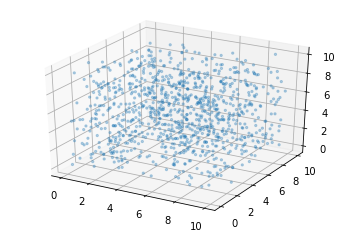

In [331]:
aleatorio1 = puntos(2000, l = 10, seed = 1)
aleatorio2 = puntos(2000, l = 10, seed = 2)
verCubo(aleatorio2)

Con estimador simple:

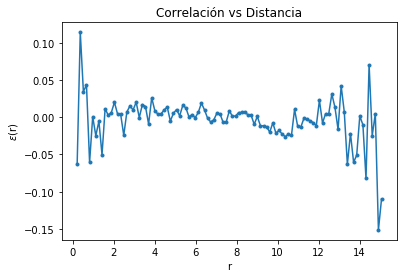

In [332]:
y = correlacion(aleatorio1, aleatorio2, l = 15, n_bins = 100)
ver_correlacion(y, l = 15)

Con estimador de Landy-Szalay

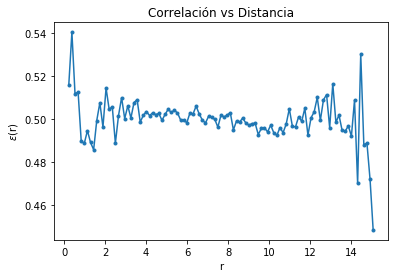

In [335]:
y_LS = correlacion_LS(aleatorio1, aleatorio2, l = 15, n_bins = 100)

ver_correlacion(y_LS, l = 15)